In [ ]:
# 통계적 분석의 이해
# - 정규분포의 이해
# - 중심극한 이론
# - 신뢰구간의 이해

# 편차를 제곱하는 이유는 - 를 없애기 위해서임
# 분산은 이 편차제곱을 평균낸 거임. 
# 표춘편차는 분산에 제곱근 씌운거
# 표춘편차에 왜 제곱은을 씌우나? 편차제곱에서 편차를 제곱했기 때문에 표춘편차에 제곱근을 씌워주어야 원래 대로 돌아감. 

# 평균은 엄청나게 중요한 정보

# 임의의 분포(모집단)에서 크기가 n인 표본을 여러 번 추출하여 
#표본평균을 구할 때, 그 표본평균들의 분포는 n이 충분히 클 경우 정규분포를 따른다.
#, 충분히 많은 수의 표본을 추출해 그 평균을 구하면 그 평균들의 분포는 정규분포에 근사한다는 내용을 담고 있습니다.

In [ ]:
#A과수원에서 생산된 사과의 평균무게는 200g으로 알려져있다.
#실제로도 그러한지 알아보기 위해 과수원에서 생산되는 사과15개를 임의로 뽑아서 무게를 측정.
#해당 데이터를 가지고 A과수원에서 생산되는 전체 사과 무게의 평균이 200g과 같다고 할 수 있는지 검정해보자

#귀무가설 : A과수원에서 생산되는 사과무게의 평균값은 200g이다.
#대립가설 : A과수원에서 생산되는 사과무게의 평균값은 200g이 아니다.

#==================================================================
# 귀무가설(꼰대)

# 기본적으로 "변화나 차이가 없다"는 주장
# 현재 상태나 일반적인 믿음을 그대로 유지하는 입장
# 검정의 출발점이자 기준선 역할을 함

#이 약은 기존 약과 효과가 같다.
#학생들의 시험 점수 평균은 25점이다. ← 위 코드에서 사용된 H₀
#기계가 생산하는 부품의 평균 길이는 10cm이다.

# 대립 가설
# 귀무가설에 반대되는 주장
# 차이가 있다,“효과가 있다”와 같이 어떤 변화나 효과가 있다는 입장

#이 약은 기존 약보다 효과가 다르다.
#학생들의 시험 점수 평균은 25점이 아니다.” ← 위 코드에서 사용된 H₁
#부품의 평균 길이는 10cm가 아니다.
#==================================================================

# 🧪 Shapiro-Wilk 검정이란?
# 목적: 데이터가 정규분포를 따르는지 확인
# 귀무가설 (H₀): 데이터는 정규분포를 따른다.
# 대립가설 (H₁): 데이터는 정규분포를 따르지 않는다.
# 통계량 (statistic): 정규성과의 유사도를 수치로 나타냄. 1에 가까울수록 정규성에 가까움.
# p-value: 귀무가설(H₀)을 기각할 수 있는지 판단하는 기준.

# statistic=0.9335: 1에 가까운 값이므로 정규성에 비교적 가까운 데이터입니다.
# pvalue=0.1803:
# 보통 유의수준(α) = 0.05 사용
# p-value > 0.05 → 귀무가설 기각 못함 → 정규분포라고 봐도 무방
# p-value < 0.05 → 귀무가설 기각 → 정규분포라고 보기 어려움

# | 항목          | 설명                            |
# | ----------- | ----------------------------- |
# | `statistic` | 0.9335 → 정규성에 어느 정도 부합        |
# | `p-value`   | 0.1803 → 0.05보다 크므로 정규성 가정 만족 |
# | 결론          | 데이터는 정규분포를 따른다고 볼 수 있음        |

data = [200,210,180,190,185,170,180,180,210,180,183,191,204,201,186]
mu = 200 # 평균

# 정규성 검사
from scipy.stats import shapiro
shapiro(data) # 정규성 검사 완료

#정규성 검정에서는 p-value가 유의수준 0.05보다 클 경우 표본이 정규분포를 따른다고 판단 할 수 있다.
# 0.05 < pvalue=0.2047226492971858 이므로 표본이 정규분포를 따른다고 판단 할 수 있다.

#분산과 표준편차를 모를때 T-검정 실시
#일표본 t-검정
import scipy.stats as stats

t_test = stats.ttest_1samp(data, mu)
print(t_test)

# TtestResult(statistic=np.float64(-3.1562714293709564), pvalue=np.float64(0.007003780898109026), df=np.int64(14))

# 결론
# p-value 가 유의수준 0.05 보다 작기 때문에 귀무가설을 기각하고, 
# A 과수원에서 생산되는 사과의 평균 무게는 200g이 아니다라고 결론내릴 수 있다. 

TtestResult(statistic=np.float64(-3.1562714293709564), pvalue=np.float64(0.007003780898109026), df=np.int64(14))


In [9]:
# 통계적 가설검정(T-검정)
# 반드시 정규분포가 되어야됨
import scipy.stats as stats

# 기온 데이터
data = [35, 40, 12, 15, 21, 14, 46, 10, 28, 48, 16, 30, 32, 48, 31, 22, 12, 39, 19, 25]

# 데이터의 평규니 25와 통계적으로 유의미하게 다른지 판단하고 싶음

# 귀무가설 = 차이가 없다(전통방식 고수) -> 증명을 하고 싶지 않은 가설 = 플로리다 일평균 기온은 25도이다. 
# 대립가설 = 차이가 있다(전통을 깨고 싶다) -> 증명하고자 하는 가설 = 플로리다 일평균 기온은 25가 아니다. 
mean = 25
shapiro_test = stats.shapiro(data)
print(shapiro_test)

#결론
# | `statistic` | 0.9335 → 정규성에 어느 정도 부합        |
# | `p-value`   | 0.1803 → 0.05보다 크므로 정규성 가정 만족 |
# | 결론          | 데이터는 정규분포를 따른다고 볼 수 있음  |

# 평균과 분산을 모르므로 T-검정 실시
t_test = stats.ttest_1samp(data, mean)
print(t_test)

# TtestResult(statistic=np.float64(0.7687155636314739), pvalue=np.float64(0.4515123595472501), df=np.int64(19))

# 결론 
# 유의 수준 0.05를 사용한다면, p-value (0.4515)가 0.05 보다 크므로 귀무 가설을 기각할 수 없다. 
# 이는 주어진 데이터가 평균이 25인 모집단에서 나올 가능성이 높다는 것을 의미한다. 
# 즉, 데이터와 주어진 평균 값(25) 간에 통계적으로 유의한 차이가 없다고 볼 수 있다. 

ShapiroResult(statistic=np.float64(0.9335052880639966), pvalue=np.float64(0.18032177427383694))
TtestResult(statistic=np.float64(0.7687155636314739), pvalue=np.float64(0.4515123595472501), df=np.int64(19))


In [18]:
# [빅데이터분석기사] 실기 3유형 단일표본 T검정(Python)
# 단일표본 다음은 22명의 학생들이 국어시험에서 받은 점수이다. 학생들의 평균이 75라고 할수 있는가?
# 귀무가설(H0) : 모평균은 mu와 같다. 학생들의 평균은 75이다.
# 대립가설(H1) : 모평균은 mu보다 크다. 학생들의 평균은 75가 아니다.
# 모집단은 정규분포를 따르고, 표본의 크기가 충분히 크다고 가정했을 때 검정통계량, p-value, 검정결과를 출력하시오.


# 데이터
scores = [75, 80, 68, 72, 77, 82, 81, 79, 70, 74, 76, 78, 81, 73, 81, 78, 75, 72, 74, 79, 78, 79]
mean = 75

# 해당 데이터가 정규성을 만족하는지 조사
shapiro_test = stats.shapiro(scores)
print(shapiro_test) # 정규성 통과 pvalue=np.float64(0.35176168207374986)

# p-value (0.3517) > 0.05 (유의수준) 이므로 정규 검정 통과
t_test = stats.ttest_1samp(scores, mean)
print(t_test)

# 귀무가설(H0): 모평균은 mu와 같다. 학생들의 평균은 75이다. 
# 대립가설(H1): 모평균은 mu보다 크다. 학생들의 평균은 75가 아니다. 

# 분산과 평균을 모르기 때문에 t-검정실시

st, pv = stats.ttest_1samp(scores, mean)
print(st, pv)

if pv < 0.05: 
    print('귀무가설을 기각하고, 대립가설을 채택합니다.')
else: 
    print('귀무가설을 기각할 수 없습니다. 귀무가설 채택')
# p-value (0.0919) > 0.05 (유의수준) 이므로 귀무 가설을 기각할 수 없다. 
# 이는 주어진 데이터가 평균이 75인 모집단에서 나올 가능성이 높다는 것을 의미한다. 
# 즉, 데이터와 주어진 평균 값(75) 간에 통계적으로 유의한 차이가 없다고 볼 수 있다. 

ShapiroResult(statistic=np.float64(0.9523773135100952), pvalue=np.float64(0.35176168207374986))
TtestResult(statistic=np.float64(1.765879233231226), pvalue=np.float64(0.09195229495418292), df=np.int64(21))
1.765879233231226 0.09195229495418292
귀무가설을 기각할 수 없습니다. 귀무가설 채택


Mean: 27.15
Median: 26.5
Standard Deviation: 12.507997441637093
Minimum Value: 10
Maximum Value: 48


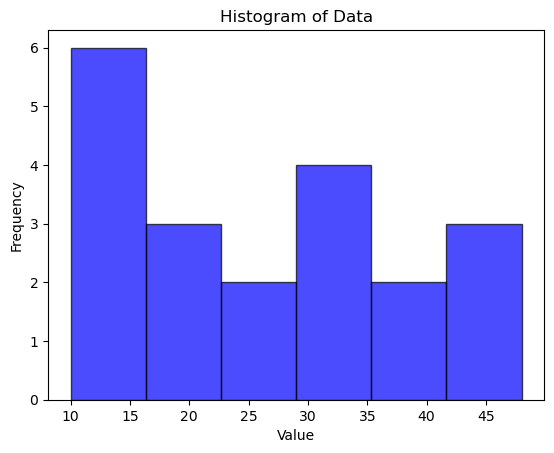

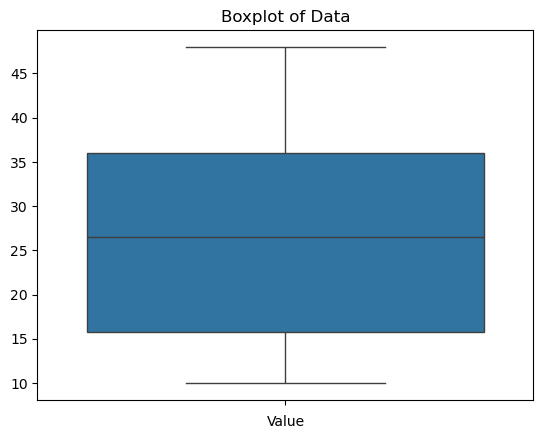

In [19]:
#자료의 기술통계치와 시각화를 해주세요.
import numpy as np

data = [35, 40, 12, 15, 21, 14, 46, 10, 28, 48, 16, 30, 32, 48, 31, 22, 12, 39, 19, 25]

mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data, ddof=1)
min_value = np.min(data)
max_value = np.max(data)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")

import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램
plt.hist(data, bins='auto', alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# 상자그림
sns.boxplot(data)
plt.title('Boxplot of Data')
plt.xlabel('Value')
plt.show()

In [ ]:
#대응표본 t-검정 (paired sample t-test)

#단일모집단에 대해 두번의 처리를 가했을 때, 두 개의 처리에 다른 평균의 차이를 비교하고자 할때 사용하는 검정

#하나의 모집단에서 크기가 n개인 하나의 표본을 추출한 후, 표본 내의 개채들에 대해서 두번의 측정을 실시한다.
#모집단과 표본은 하나씩이지만, 각 개체들에 대해 두 개씩의 관측값이 존재하므로 모수는 두개이다.
#모집단의 관측값이 정규성을 만족해야한다. 일반적으로 표본의 크기가 충분히 클 때 중심극한정리에 따라 정규성을 만족한다고 볼 수 있다.
#종속변수는 연속형 변수여야함
#부부 30쌍을 대상으로 남편과 아내의 결혼 만족도에 차이, 쌍둥이 연구, before-after 연구 모두 paired t-test를 사용

# 데이터 수집
before = [36.8, 36.7, 37.1, 36.9, 37.2, 36.8, 36.9, 37.1, 36.7, 37.1] # 약 먹기전
after = [36.5, 36.6, 36.3, 36.6, 36.9, 36.7, 36.7, 36.8, 36.5, 36.7] # 약 먹은후

In [25]:
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#대응표본 t-검정 (paired sample t-test)

#단일모집단에 대해 두번의 처리를 가했을 때, 두 개의 처리에 다른 평균의 차이를 비교하고자 할때 사용하는 검정

#하나의 모집단에서 크기가 n개인 하나의 표본을 추출한 후, 표본 내의 개채들에 대해서 두번의 측정을 실시한다.
#모집단과 표본은 하나씩이지만, 각 개체들에 대해 두 개씩의 관측값이 존재하므로 모수는 두개이다.
#모집단의 관측값이 정규성을 만족해야한다. 일반적으로 표본의 크기가 충분히 클 때 중심극한정리에 따라 정규성을 만족한다고 볼 수 있다.
#종속변수는 연속형 변수여야함
#부부 30쌍을 대상으로 남편과 아내의 결혼 만족도에 차이, 쌍둥이 연구, before-after 연구 모두 paired t-test를 사용

# 데이터 수집
before = [36.8, 36.7, 37.1, 36.9, 37.2, 36.8, 36.9, 37.1, 36.7, 37.1] # 약 먹기전
after = [36.5, 36.6, 36.3, 36.6, 36.9, 36.7, 36.7, 36.8, 36.5, 36.7] # 약 먹은후

#데이터 시각화
# df = pd.DataFrame({'before':before,"after":after})

# df.head()
# plt.figure(figsize=(6,6))
# sns.boxenplot(data=df)

# 정규성 검사
normal_before = stats.shapiro(before)
normal_after = stats.shapiro(after)

# 모두 p-value 가 0.05 보다 커서 정규성을 만족한다. 
print(normal_before) # pvalue=np.float64(0.2025800152029294)
print(normal_after) # pvalue=np.float64(0.8497324952284004)

# T-검정실시

# 귀무가설 = 약물을 복용하기 전과 복용한 후의 평균 체온은 유의미한 차이가 없다. 
# 대립가설 = 약물을 복용하기 전과 복용한 후의 평균 체온은 유의미한 차이가 있다. 

st, pv = stats.ttest_rel(before, after)
print(pv) # 0.001053871257016611

# 결론
# p-value 가 0.05 보다 작으므로 대립가설 채택
# 약물을 복용하기 전과 복용한 후의 평균 체온은 유의미한 차이가 있다. 

ShapiroResult(statistic=np.float64(0.8969133747040112), pvalue=np.float64(0.2025800152029294))
ShapiroResult(statistic=np.float64(0.9658310017893624), pvalue=np.float64(0.8497324952284004))
0.001053871257016611


ShapiroResult(statistic=np.float64(0.9644595362997496), pvalue=np.float64(0.8352703969642297))
ShapiroResult(statistic=np.float64(0.9456836842543015), pvalue=np.float64(0.6177986322207938))
0.0010538712570165528


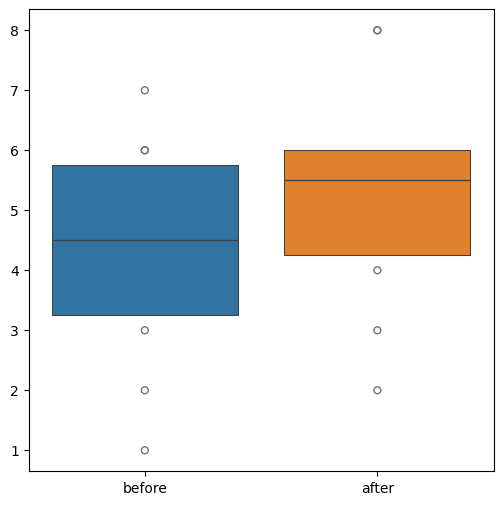

In [31]:
# 대응표본이란 같은 대상에 대해 두 번의 측정을 한 후 두 측정치의 평균이 차이가 있는지 비교하는 통계적 방법

# 대응표본 t-검정 10명의 환자를 대상으로 수면영양제를 복용하기 전과 후의 수면시간을 측정하여 영양제의 효과가 있는지를 판단하고자 한다.
# 표본이 정규성을 만족한다는 가정하에 단측검정을 수행한다.


import pandas as pd

before = [7,3,4,5,2,1,6,6,5,4]
after = [8,4,5,6,2,3,6,8,6,5]

# 데이터 시각화
df = pd.DataFrame({'before': before, 'after': after})

df.head()
plt.figure(figsize=(6,6))
sns.boxenplot(data=df)

# 정규성 검증
before_shapiro = stats.shapiro(before)
after_shapiro = stats.shapiro(after)

print(before_shapiro) # pvalue=np.float64(0.8352703969642297)
print(after_shapiro) # pvalue=np.float64(0.6177986322207938)
# 정규성 검사 통과

# T-검정실시

# 귀무가설 = 약물을 복용하기 전과 복용한 후의 평균 수면시간에는 유의미한 차이가 없다. ( D=0)
# 대립가설 = 약물을 복용하기 전과 복용한 후의 평균 수면시간에는 유의미한 차이가 있다. 


st, pv = stats.ttest_rel(before, after) # 0.0010538712570165528
print(pv)

# 결론
# 0.05 보다 작으므로 대립가설 채택
# 평균 수면시간에서 유의미한 차이가 있음. 

In [39]:
# 독립표본 t-검정이란?
# 독립표본 t-검정은 두 서로 독립적인 집단의 평균을 비교하여, 두 집단 간 평균의 차이가 통계적으로 유의미한지를 검정하는 방법

#남학생과 여학생의 시험 점수 평균 비교
#신약을 복용한 그룹과 그렇지 않은 그룹의 혈압 비교
#광고 A를 본 집단과 광고 B를 본 집단의 구매율 비교

#독립 표본이란 서로 간섭하지 않는, 서로 다른 두 집단의 표본을 말합니다.

# 수학점수 
boys = [85, 90, 88, 92, 87]
girls = [78, 75, 80, 77, 74]

normal_boys = stats.shapiro(boys)
normal_girls = stats.shapiro(girls)

print(normal_boys) # pvalue=np.float64(0.9796155110633016)
print(normal_girls) # pvalue=np.float64(0.8989039812387174)

# t-검정
# 가설
# 귀무가설: 남자와 여자의 수학평균 점수 차이는 없다. 
# 대립가설: 남자와 여자의 수학평균 점수 차이는 있다. 

st, pv = stats.ttest_ind(boys, girls)
print(st, pv) # 7.194014606174096 9.299301308730462e-05
print(format(pv, 'f')) # 고정 소수점 형식(fixed-point)으로 변환

# 결론
# 대립가설 채택 - 남자와 여자의 평균 점수에는 유의미한 차이가 있다. 

ShapiroResult(statistic=np.float64(0.9899774665106802), pvalue=np.float64(0.9796155110633016))
ShapiroResult(statistic=np.float64(0.9737784426429859), pvalue=np.float64(0.8989039812387174))
7.194014606174096 9.299301308730462e-05
0.000093


In [ ]:
# a,b두 지역의 겨울 낮 최고기온에 차이가 있는지를 알아보기 위해
#  10일동안 두 지역의 낮 최고기온을 측정한 데이터로 독립표본 t검정을 수행해보자. (표본이 정규성을 만족한다는 가정 하에 양측검정 수행)

import scipy.stats as stats

a = [-1,0,3,4,1,3,3,1,1,3]
b = [6,6,8,8,11,11,10,8,8,9]

a_shapiro = stats.shapiro(a)
b_shapiro = stats.shapiro(b)

print(a_shapiro) # pvalue=np.float64(0.22182218242958046)
print(b_shapiro) # pvalue=np.float64(0.2197459305465892)
# 정규성 통과

# 귀무가설: 두 지역의 낮 최고기온에 차이가 없다.
# 대립가설: 두 지역의 낮 최고기온에 차이가 있다.

st, pv = stats.ttest_ind(a, b)
print(pv) # 0.6.085029390352169e-08

# 0.05 이하이므로 대립 가설 채택
# 두 지역의 낮 최고기온에 차이가 있다.  


ShapiroResult(statistic=np.float64(0.9004894200215035), pvalue=np.float64(0.22182218242958046))
ShapiroResult(statistic=np.float64(0.9001171187184267), pvalue=np.float64(0.2197459305465892))
6.085029390352169e-08
